<div align="center">
    <h1>DS-210: Programming for Data Science</h1>
    <h1>Lecture 11</h1>
</div>

**Topics:**

* Representing Graphs
* Sample Graph Algorithms


# 1. Representing graphs

> **Definition:** A graph is a collection of nodes (a.k.a. vertices) connected by edges.

## Why are graphs useful?

Lots of problems reduce to graph problems
* The Internet is a graph: nodes are devices that have IP address, routes are edges
  * (Example algorithms: Shortest path, min/max flow)
  * (how many devices on the internet?)
* The Web is a graph (crawlers) (how many web pages on the internet?)
* Social networks are graphs (graph degrees, k-connectivity)
* Logistics hubs and transportation are graphs (Traveling salesman, subway and bus schedules)
* Computer scheduling (instruction dependencies)
* GSM frequency scheduling (Graph coloring -- no two connected nodes are same color)
* Medical school residency assignments (stable marriage algorithm)
* And many others....

## What types of graphs are there?

* Directed vs Undirected
* Weighted (cost on the edge) vs Unweighted (all edges have same cost)
* Special
  * Tree (every node has a single parent, no cycles)
  * Rooted tree (single parent node, very common and useful, includes heaps, b-trees, tries etc).
  * DAG (most workflows are DAGs)
  * Bi-partite (can be separated to 2 sides with all edges crossing sides)
  * Cliques (every node is connected to every other node)

## Graph representations: various options

* What information we want to access

* What efficiency required

<div align="center">
    <img src="graph.svg" alt="[sample image]">
</div>

**Today:**

* Edges List
* Vertex Adjacency lists 
* Vertex Adjacency matrix 



Focus on undirected graphs:
 * easy to adjust for directed

## Edges List

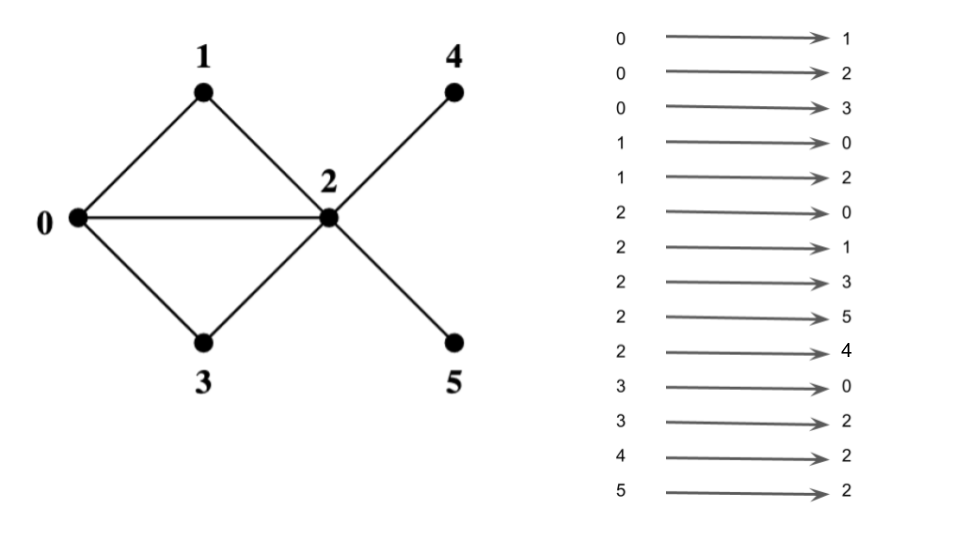

* List of directed or undirected edges
* Can be sorted/ordered for easier access/discovery
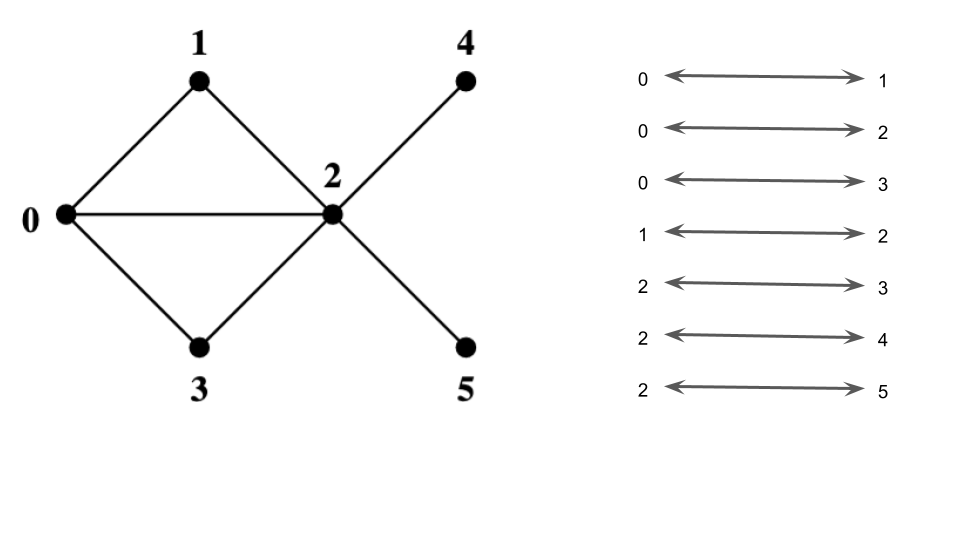

In [2]:
// number of vertices
let n : usize = 6;

// list of edges
let edges : Vec<(usize,usize)> = vec![(0,1), (0,2), (0,3), (1,2), (2,3), (2,4), (2,5)];
println!("{:?}", edges);
println!("{:?}",edges.binary_search(&(2,3)));
println!("{:?}",edges.binary_search(&(1,3)));

[(0, 1), (0, 2), (0, 3), (1, 2), (2, 3), (2, 4), (2, 5)]
Ok(4)
Err(4)


## Adjacency lists

For each vertex, store the list of its neighbors

<br>
<div align="center">
  <img src="sparse.png" alt="[sample graph]">
</div>

Collection:
 * classical approach: linked list
 * vectors

In [3]:
// Create a vector of length n of empty vectors
let mut graph_list : Vec<Vec<usize>> = vec![vec![];n];

// iterate through the node pairs
for (v,w) in edges.iter() {
    graph_list[*v].push(*w);
    graph_list[*w].push(*v);  // for undirected, v is also connected to w
};

for i in 0..graph_list.len() {
    println!("{}: {:?}", i, graph_list[i]);
};

println!("{:?}", graph_list[2].binary_search(&3));
println!("{:?}", graph_list[1].binary_search(&3));

0: [1, 2, 3]
1: [0, 2]
2: [0, 1, 3, 4, 5]
3: [0, 2]
4: [2]
5: [2]
Ok(2)
Err(2)


## Adjacency matrix

* $n$ vertices
* $n \times n$ matrix
* For each pair of vertices, store a boolean value: edge present or not
* Matrix is symmetric for undirected graph

<div align="center">
<img src="dense.svg" alt="sample dense graph">
</div>

In [4]:
// make a vector of n vectors of length n
// initialized to false
let mut graph_matrix = vec![vec![false;n];n];

// iterate and set entries to true where edges exist
for (v,w) in edges.iter() {
    graph_matrix[*v][*w] = true;
    graph_matrix[*w][*v] = true; 
};
for row in &graph_matrix {
    for entry in row.iter() {
        print!(" {} ",if *entry {"1"} else {"0"});
    }
    println!("");
};
println!("{}", graph_matrix[2][3]);
println!("{}", graph_matrix[1][3]);

 0  1  1  1  0  0 
 1  0  1  0  0  0 
 1  1  0  1  1  1 
 1  0  1  0  0  0 
 0  0  1  0  0  0 
 0  0  1  0  0  0 
true
false


## Sample Graph Recap


<div align="center">
    <img src="graph.svg" alt="[sample image]">
</div>

This lecture's graphs:
* undirected
* no self-loops
  * self-loop: edge connecting a vertex to itself
* no parallel edges (connecting the same pair of vertices)

Simplifying assumption:
* $n$ vertices labeled $0\ldots n-1$

## What if labels are not in $\{0,1,\ldots n-1\}$?

For example:
* nodel labels are not numbers, e.g. strings

`T`${}={}$type of labels

**Solution 1:** Map everything to this range (most common)
  * Create hash maps from input labels to $\{0,1,\ldots n-1\}$
  * Create a reverse hash map to recover labels when needed

**Solution 2:** Replace with hash maps and hash sets (less common, harder to use)

  * Adjacency lists: use `HashMap<T,Vec<T>>`
    * first node is the key and values is the adjacency list 
  * Adjacency matrix: use `HashSet<(T,T)>`
    * Sets of tuples where node pairs that are connected are inserted
  * Bonus gain: `HashSet<(T,T)>` better than adjacency matrix for sparse graphs

## What if the graph is directed?

**Adjacency lists:**
* separate lists incoming/outgoing edges
* depends on what information needed for your algorithm


**Adjacency matrix:**
* example: edge $u \rightarrow v$ and no edge in the opposite direction:
  * `matrix[u][v] = true`
  * `matrix[v][u] = false`
* Matrix is no longer symmetric

# 2. Sample graph algorithms


## Count triangles

**Problem to solve:** Consider all triples of vertices. What is the number of those in which all vertices are connected?  And alternatively how many unique triangles does a vertex belong to?
* Why is this important?  Turns out that hosts that contain spam pages have a very different triangle patterns then regular hosts (https://chato.cl/papers/becchetti_2007_approximate_count_triangles.pdf)

<div align="center">
    <img src="spam.png" alt="spam graph">
</div>
<div style="text-align:center">
        <em>Separation of non-spam and spam hosts in the histogram of triangles</em>
</div>

* Also clustering coefficients in social networks: https://cs.stanford.edu/~rishig/courses/ref/l1.pdf

---

<div style="text-align: center">
    <b>Solution 1</b>
</div>

---

**Enumerate explicitly over all triples and check which are triangles, using the adjacency matrix.**

`graph_matrix[][]`

<div align="center">
    <img src="dense.svg" alt="sample dense graph">
</div>

In [5]:
let mut count: u32 = 0;
let mut coefficients: Vec<u32> = vec![0;n];
for u in 0..n {
    for v in u+1..n {
        for w in v+1..n {
            if (graph_matrix[u][v] && graph_matrix[v][w] && graph_matrix[w][u]) {
                count += 1;
                coefficients[u] += 1;
                coefficients[v] += 1;
                coefficients[w] += 1;
            }
        }
    }
}
println!("{}", count);
println!("{:?}", coefficients);

2
[2, 1, 2, 1, 0, 0]


### Complexity of the algorithm above is $O(n^3)$

Why?

**hint:** look at the nested loops.


---

<div style="text-align: center">
    <b>Solution 2</b>
</div>

---

**Follow links from each vertex to see if you come back in three steps, using adjacency list.**

<div align="center">
<img src="sparse.png" alt="[sample graph]">
</div>

In [6]:
let mut count: u32 = 0;
for u in 0..n {
    for v in &graph_list[u] {  // v is the adjacency list for node u
        for w in &graph_list[*v] {  // w is the adjacency list for node v
            for u2 in &graph_list[*w] {  // now iterate through this 3rd list
                if u == *u2 {  // if we find the origin node, we closed the loop in 3 steps
                    count += 1;
                    break;
                }
            }
        }
    }
}
count

12

Now we need to account for duplicate counting.

For every triangle there are **2** different directions to traverse the same nodes.

For every triangle, we can start with one each of the **3** nodes to count.

In [7]:
// need to divide by 6
// due to symmetries triangles counted multiple times
count / (2*3)

2

### Complexity

We have 4 nested loops, so worse case where every node is connected to every other node, we have 
complexity of $O(n^4)$.

In practice, nodes are connected more sparsely and the complexity can be shown to be $O(n*m)$, where $n$ is number of nodes and $m$ is number of edges.

**Question:** How did we avoid duplicate counting in the matrix version, Solution 1?

---

<div style="text-align: center">
    <b>Solution 2 -- Alternate using recursion</b>
</div>

---

Different implementation of solution 2, using a recursive algorithm.

* Do a recursive walk through the graph and terminate after 3 steps.
* If I land where I started, then I found a triangle.


In [8]:
fn walk(current:usize, destination:usize, steps:usize, adjacency_list:&Vec<Vec<usize>>) -> u32 {
    match steps {
        0 => if current == destination {1} else {0},
        _ => {
            let mut count = 0;
            for v in &adjacency_list[current] {
                count += walk(*v,destination,steps-1,adjacency_list);
            }
            count
        }
    }
}

In [9]:
let mut count = 0;
for v in 0..n {
    count += walk(v,v,3,&graph_list);
}
count / 6

2

---

<div style="text-align: center">
    <b>Solution 3</b>
</div>

---

**For each vertex try all pairs of neighbors (via adjacency lists) and see if they are connected (via adjacency matrix).**

In [10]:
let mut count: u32 = 0;

for u in 0..n {
    let neighbors = &graph_list[u];  // get the adjacency list for node `u`

    // now try all combinations of node pairs from that adjacency list
    for v in neighbors {
        for w in neighbors {
            if graph_matrix[*v][*w] {  // v,w are connected and both connected to u since they are in u's adjacency list
                count += 1;
            }
        }
    }
}

// again we duplicated counted
count / 6

2

## In-class Piazza Poll

https://piazza.com/class/m5qyw6267j12cj/post/207

